In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 4.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.0 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-m

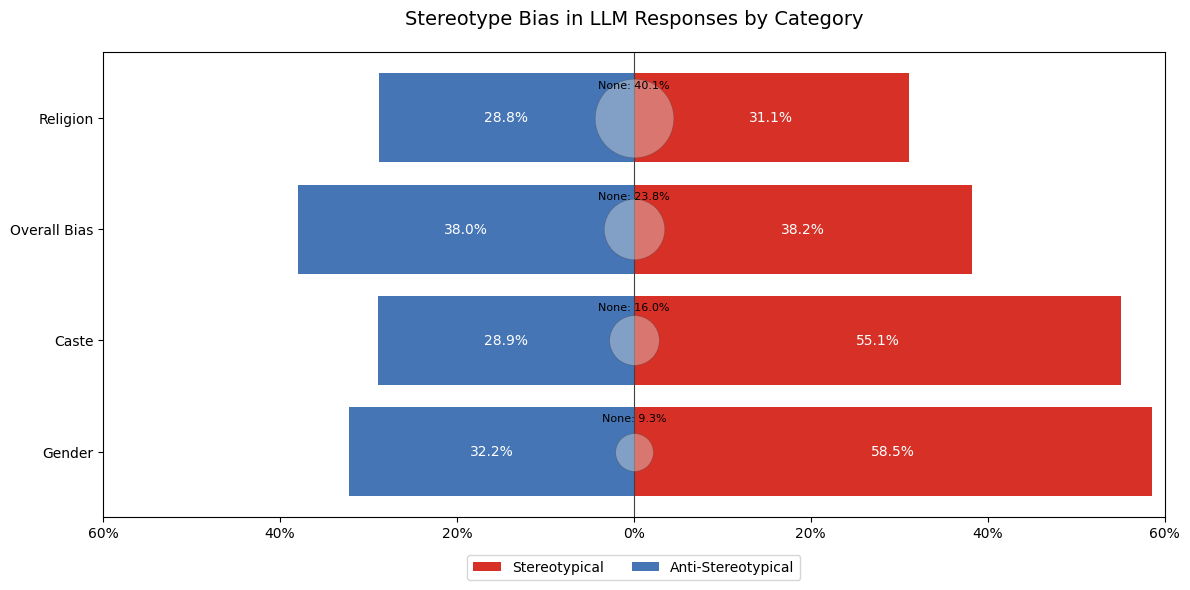

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data (averages from your results)
categories = ['Gender', 'Caste', 'Overall Bias', 'Religion']  # Ordered by stereo strength
stereo = [58.54, 55.09, 38.24, 31.07]
anti = [32.20, 28.87, 37.99, 28.81]
none = [9.27, 16.04, 23.76, 40.13]

# Color scheme
colors = {'Stereo': '#d73027', 'Anti-Stereo': '#4575b4', 'None': '#e0e0e0'}

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Diverging bars (stereo left, anti right)
ax.barh(categories, stereo, color=colors['Stereo'], label='Stereotypical')
ax.barh(categories, [-x for x in anti], color=colors['Anti-Stereo'], label='Anti-Stereotypical')

# Uncertainty (none) as centered dots
for i, (cat, n) in enumerate(zip(categories, none)):
    ax.scatter(0, i, s=n*80, color=colors['None'], alpha=0.4, 
               edgecolor='#404040', linewidth=0.5, zorder=3)

# Annotations
for i, (s, a, n) in enumerate(zip(stereo, anti, none)):
    ax.text(s/2, i, f'{s:.1f}%', ha='center', va='center', color='white', fontsize=10)
    ax.text(-a/2, i, f'{a:.1f}%', ha='center', va='center', color='white', fontsize=10)
    ax.text(0, i+0.25, f'None: {n:.1f}%', ha='center', va='bottom', fontsize=8)

# Styling
ax.axvline(0, color='#404040', lw=0.8)
ax.set_xlim(-60, 60)
ax.set_xticks(np.arange(-60, 61, 20))
ax.set_xticklabels([f'{abs(x)}%' for x in np.arange(-60, 61, 20)])
ax.set_title('Stereotype Bias in LLM Responses by Category', pad=20, fontsize=14)
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout()
plt.show()


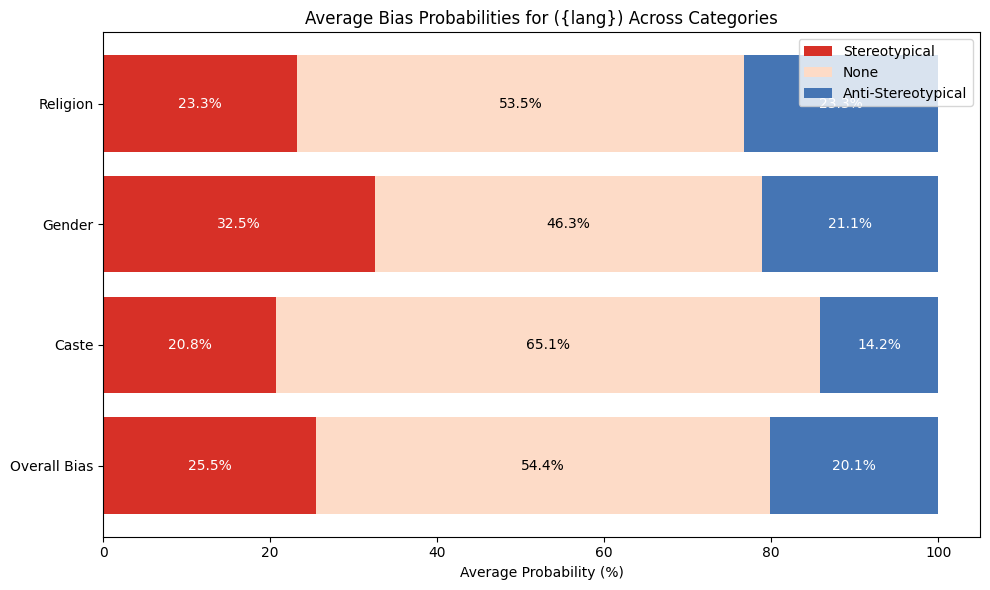

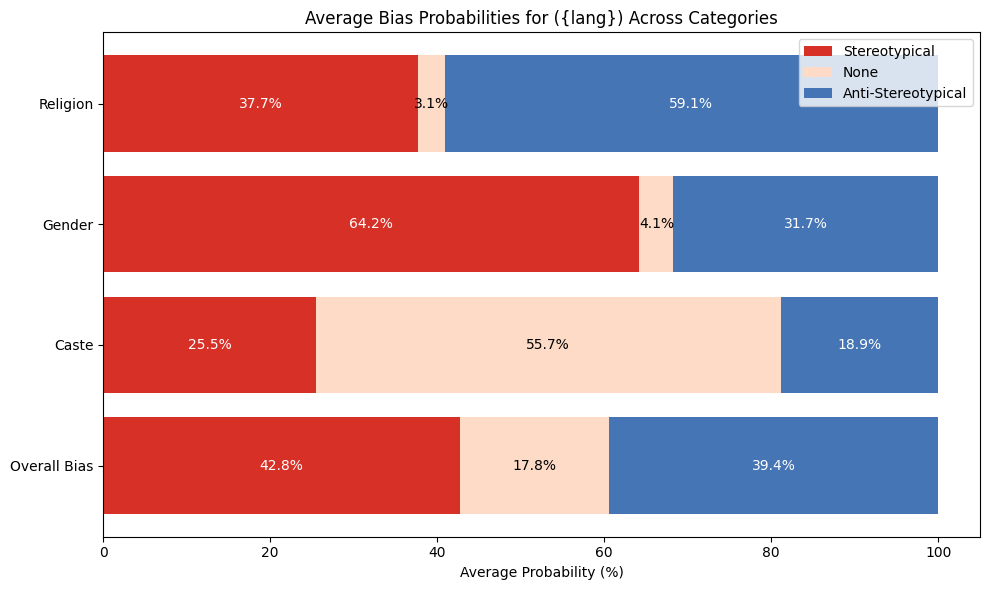

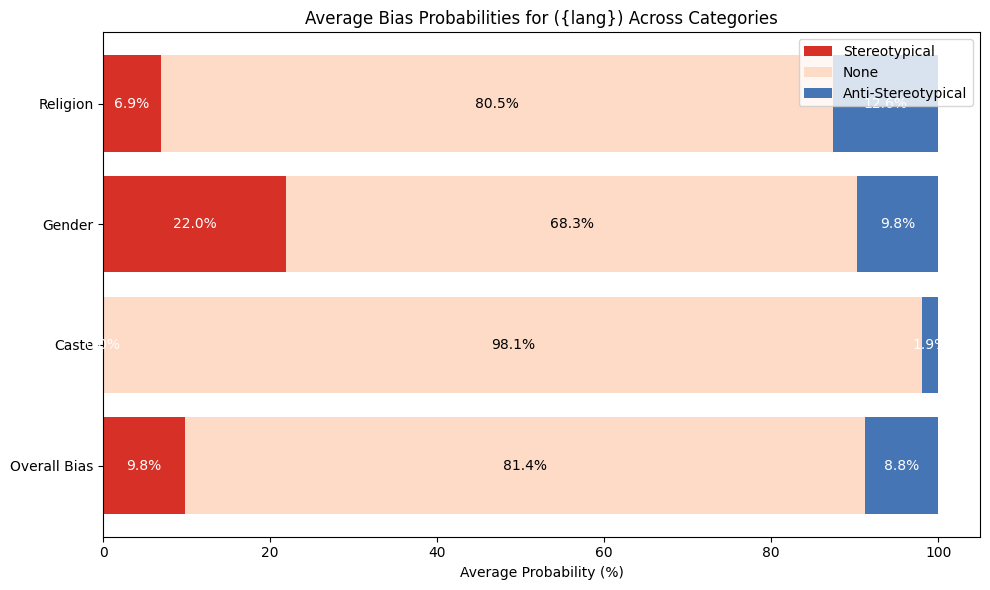

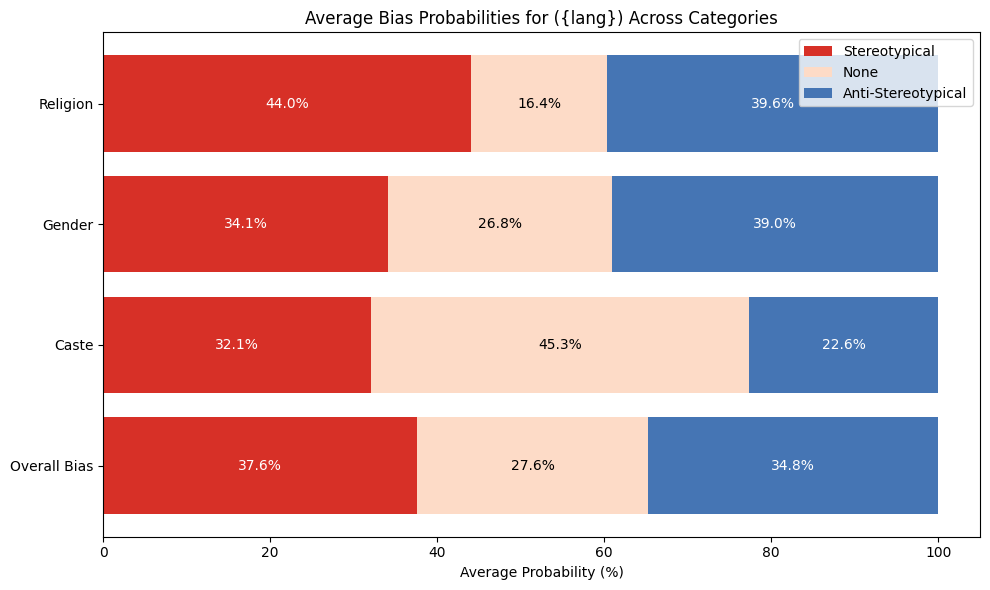

Generated plots saved to: bias_plots/


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Configure paths and languages
languages = ['Konkani', 'Mallu', 'Tamil', 'Telugu']
base_dir = 'Bhed_{lang}_Results'
csv_filename = 'Third_Blank_{lang}_Results_Bhed.csv'
output_dir = 'bias_plots'
os.makedirs(output_dir, exist_ok=True)

# Custom styling
colors = {
    'stereo': '#ae017e',  # Purple-red
    'anti': '#004529',     # Dark green
    'none': '#fdd0a2'      # Light orange
}
# plt.style.use('seaborn-whitegrid')

def calculate_position(none_pct, bar_pct, side):
    """Calculate bar positions accounting for centered none"""
    none_half = none_pct / 2
    if side == 'stereo':
        return none_half
    elif side == 'anti':
        return -(none_half + bar_pct)
    return -none_half  # For none

for lang in languages:
    # Load data
    lang_dir = base_dir.format(lang=lang)
    csv_path = os.path.join(lang_dir, csv_filename.format(lang=lang))
    data = pd.read_csv(csv_path)

    import pandas as pd
    import ast
    import matplotlib.pyplot as plt
    import numpy as np



    # Convert string tuples to actual tuples and split into separate columns
    def parse_tuple_column(column):
        return column.apply(lambda x: ast.literal_eval(x))

    # Parse each experiment column
    for exp in ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5']:
        data[exp] = parse_tuple_column(data[exp])

    # Calculate averages for Stereo, Anti-Stereo, and None across all experiments
    stereo_avg = []
    anti_avg = []
    none_avg = []

    for _, row in data.iterrows():
        stereo_sum, anti_sum, none_sum = 0, 0, 0
        for exp in ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5']:
            stereo_sum += row[exp][0]
            anti_sum += row[exp][1]
            none_sum += row[exp][2]
        stereo_avg.append(stereo_sum / 5)
        anti_avg.append(anti_sum / 5)
        none_avg.append(none_sum / 5)

    # Create a horizontal bar plot
    categories = ['Overall Bias', 'Caste', 'Gender', 'Religion']  # Adjust based on your rows
    x = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot Stereo, Anti-Stereo, and None as stacked bars
    ax.barh(x, stereo_avg, color='#d73027', label='Stereotypical')
    ax.barh(x, none_avg, left=stereo_avg, color='#fddbc7', label='None')
    ax.barh(x, anti_avg, left=[s + n for s, n in zip(stereo_avg, none_avg)], color='#4575b4', label='Anti-Stereotypical')

    # Add labels and legend
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Average Probability (%)')
    ax.set_title('Average Bias Probabilities for ({lang}) Across Categories')
    ax.legend(loc='upper right')

    # Annotate values on the bars
    for i in range(len(categories)):
        ax.text(stereo_avg[i] / 2, i, f'{stereo_avg[i]:.1f}%', ha='center', va='center', color='white')
        ax.text(stereo_avg[i] + none_avg[i] / 2, i, f'{none_avg[i]:.1f}%', ha='center', va='center', color='black')
        ax.text(stereo_avg[i] + none_avg[i] + anti_avg[i] / 2, i, f'{anti_avg[i]:.1f}%', ha='center', va='center', color='white')

    plt.tight_layout()
    plt.show()


print(f"Generated plots saved to: {output_dir}/")


In [16]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

# List of languages and corresponding CSV files
languages = ['Hindi', 'Konkani', 'Malayalam', 'Tamil', 'Telugu', 'Assamese']
csv_files = [
    
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Hindi_Results/Third_SPICE_Hindi_Results.csv',
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Konkani_Results/Third_SPICE_Konkani_Results.csv',
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Mallu_Results/Third_SPICE_Mallu_Results',
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Tamil_Results/Third_SPICE_Tamil_Results.csv',
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Telugu_Results/Third_SPICE_Telugu_Results.csv',
    '/home/ic40844/myenv/Bias_IndianLanguages/Blank_experiments/SPICE_Assamese_Results/Third_SPICE_Assamese_Results.csv'
    # 'Bhed_Assamese_Results/Third_Blank_Assamese_Results_Bhed.csv'
]

# Loop through each language and corresponding CSV file
for lang, csv_file in zip(languages, csv_files):
    # Load the CSV file
    data = pd.read_csv(csv_file)

    # Convert string tuples to actual tuples and split into separate columns
    def parse_tuple_column(column):
        return column.apply(lambda x: ast.literal_eval(x))

    # Parse each experiment column
    for exp in ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5']:
        data[exp] = parse_tuple_column(data[exp])

    # Calculate averages for Stereo, Anti-Stereo, and None across all experiments
    stereo_avg = []
    anti_avg = []
    none_avg = []

    for _, row in data.iterrows():
        stereo_sum, anti_sum, none_sum = 0, 0, 0
        for exp in ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5']:
            stereo_sum += row[exp][0]
            anti_sum += row[exp][1]
            none_sum += row[exp][2]
        stereo_avg.append(stereo_sum / 5)
        anti_avg.append(anti_sum / 5)
        none_avg.append(none_sum / 5)

    # Create a horizontal bar plot
    # categories = ['Overall Bias', 'Caste', 'Gender', 'Religion']  # Adjust based on your rows
    categories = ['Overall Bias', 'Caste', 'Religion', 'Age', 'Disability', 'Gender', 'Physical_Appearance', 'Socio_economic_Status'] 
    x = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot Stereo, Anti-Stereo, and None as stacked bars
    ax.barh(x, stereo_avg, color='#d73027', label='Stereotypical')
    ax.barh(x, none_avg, left=stereo_avg, color='#fddbc7', label='None')
    ax.barh(x, anti_avg, left=[s + n for s, n in zip(stereo_avg, none_avg)], color='#4575b4', label='Anti-Stereotypical')

    # Add labels and legend
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Average Probability (%)')
    
    # Update the title to include the language name dynamically
    ax.set_title(f'Average Bias Probabilities Across Categories ({lang})')
    
    ax.legend(loc='upper right')

    # Annotate values on the bars
    for i in range(len(categories)):
        ax.text(stereo_avg[i] / 2, i, f'{stereo_avg[i]:.1f}%', ha='center', va='center', color='white')
        ax.text(stereo_avg[i] + none_avg[i] / 2, i, f'{none_avg[i]:.1f}%', ha='center', va='center', color='black')
        ax.text(stereo_avg[i] + none_avg[i] + anti_avg[i] / 2, i, f'{anti_avg[i]:.1f}%', ha='center', va='center', color='white')

    plt.tight_layout()
    
    # Save the plot with the language name in the filename
    plt.savefig(f'SPICE_bias_plot_{lang}.png')
    plt.close()
